In [7]:
%matplotlib inline
import quandl
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
token='QWe8iSbyAFzRuod2aroM'

In [8]:
import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

In [77]:
mkts={'SP 500':'CHRIS/CME_SP1',
	  'Natural Gas':'CHRIS/CME_NG1',
      #'US 10Y':'CHRIS/CME_TY1',
      'Crude Oil':'CHRIS/CME_CL1',
      'Eurostoxx 50':'CHRIS/EUREX_FESX1',
      'Dollar Index':'CHRIS/ICE_DX1',
      #'Wheat':'CHRIS/CME_W7',
      'Corn':'CHRIS/CME_C1',
      'Dax':'CHRIS/EUREX_FDAX1',
      'FTSE100':'CHRIS/LIFFE_Z1',
      'Eurodollar':'CHRIS/CME_ED1',
      'Euro':'CHRIS/CME_EC1',
      'GBP':'CHRIS/CME_BP1',
      'Gold':'CHRIS/CME_EC1'

      }

In [78]:
data_index=pd.DataFrame()
for m in mkts.keys():
    try:
        data_index[m]=quandl.get(mkts[m],authtoken=token).Last
    except:
        data_index[m]=quandl.get(mkts[m],authtoken=token).Settle
data_pct=data_index.dropna().pct_change()

In [79]:
data=data_pct.dropna()
number=data.count().iloc[1]


In [109]:
window=20
results=pd.DataFrame()
for i in range(window+1,number):
    pca = PCA(n_components=5)
    pca.fit(data[i-window:i])
    results[data.iloc[i].name]=pd.Series(pca.explained_variance_)**.5

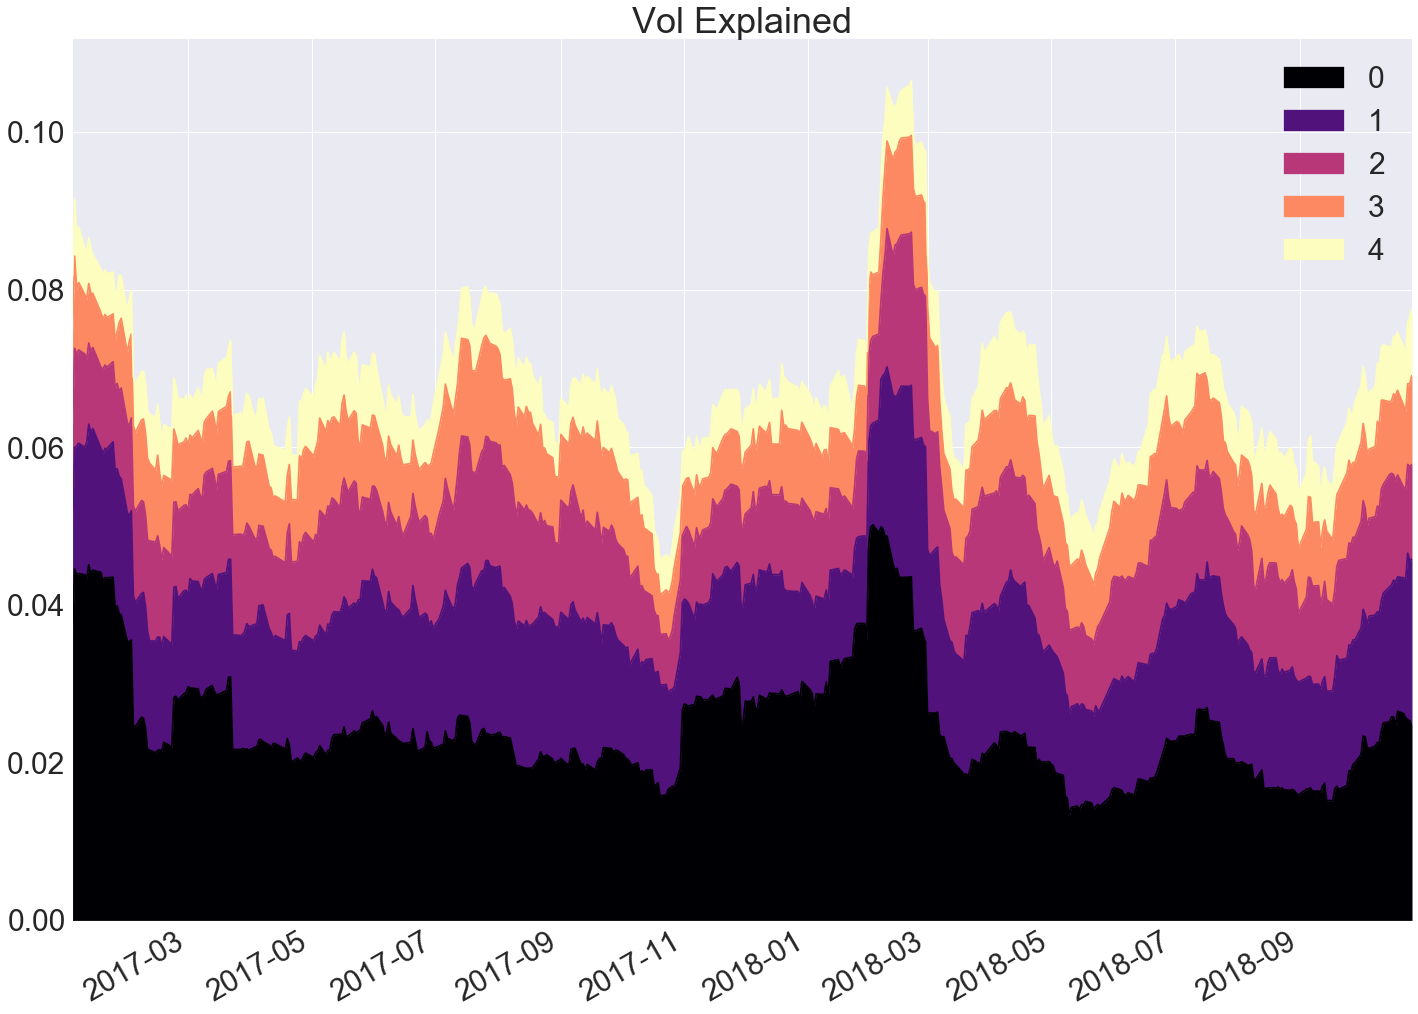

In [111]:
results.T['2017':].plot(kind='area',colormap='magma',title='Vol Explained')

In [75]:
pd.Series(pca.explained_variance_)

0    0.018485
1    0.016330
2    0.013419
dtype: float64

In [71]:
import math

In [42]:
pca = PCA(n_components=2)
pca.fit(data[345:445])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [56]:
results[data.iloc[345].name]=pd.Series(pca.explained_variance_)

0    0.000920
1    0.000649
dtype: float64

In [55]:
data.iloc[345].name

Timestamp('2016-06-24 00:00:00')

In [15]:
window =100
# Initialize an empty df of appropriate size for the output
df_pca = pd.DataFrame( np.zeros((data_pct.shape[0] - window + 1, data_pct.shape[1])) )

# Define PCA fit-transform function
# Note: Instead of attempting to return the result, 
#       it is written into the previously created output array.
def rolling_pca(window_data):
    pca = PCA()
    transf = pca.fit_transform(data_pct.iloc[window_data])
    df_pca.iloc[int(window_data[0])] = transf[0,:]
    return True

# Create a df containing row indices for the workaround
df_idx = pd.DataFrame(np.arange(data_pct.shape[0]))

# Use `rolling` to apply the PCA function
_ = df_idx.rolling(window).apply(rolling_pca)

# The results are now contained here:


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
df_pca.head()

In [ ]:
mkts={'SP 500':'CHRIS/CME_SP1',
      'US 10Y':'CHRIS/CME_TY1',
      'Crude Oil':'CHRIS/CME_CL1',
      'Eurostoxx 50':'CHRIS/EUREX_FESX1'
      }

In [ ]:
data_index=pd.DataFrame()
for m in mkts.keys():
    try:
        data_index[m]=quandl.get(mkts[m],token=token).Last
    except:
        data_index[m]=quandl.get(mkts[m],token=token).Settle
data_pct=data_index.pct_change()     

In [ ]:
data_pct['2018':].cumsum().ffill().plot(colormap='brg')

In [67]:

fil='https://cib.societegenerale.com/fileadmin/indices_feeds/CTAM_Historical.xls'
x=pd.read_csv(fil,sep='\t',index_col=0,parse_dates=[0],usecols=[0,1])
x.ix[:,0].plot()

In [84]:
web_root='https://cib.societegenerale.com/fileadmin/indices_feeds/'
indices={'CTA':'CTA_Historical.xls',
         'CTA Mutual Funds':'CTAM_Historical.xls',
         'Trend Index':'Trend_Index_Historical.xls',
         'Short Term Traders Index':'STTI_Historical.xls',
         'Multi Alternative Risk Premia':'MARP_Historical.xls'
        }
data_index=pd.DataFrame()
for i in indices.keys():
    file='https://cib.societegenerale.com/fileadmin/indices_feeds/'+indices[i]
    data_index[i]=pd.read_csv(file,sep='\t',index_col=0,parse_dates=[0],usecols=[0,1]).ix[:,0]


/Users/mrefermat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


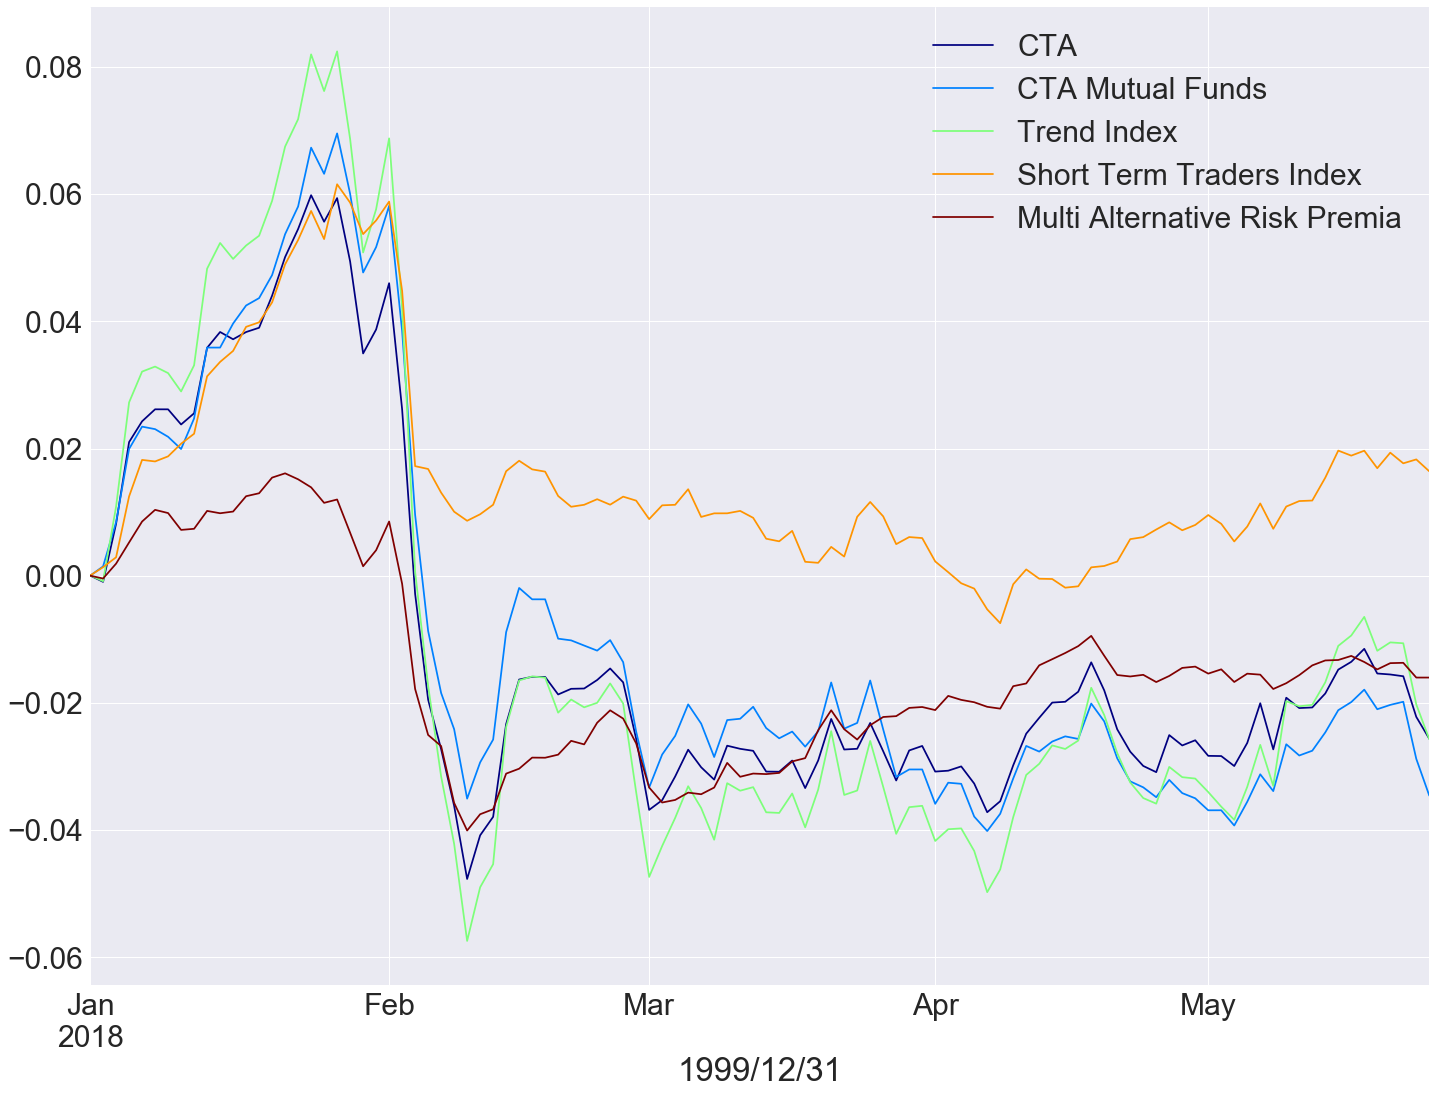

In [85]:
data_index.pct_change()['2018':].cumsum().ffill().plot(colormap='jet')

In [101]:
df = pd.DataFrame()
df['CTA']=data_index.CTA
df['SP500']=quandl.get('CHRIS/CME_SP1',authtoken=token).Last
df=df.dropna().pct_change()

/Users/mrefermat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(com=20,min_periods=0,ignore_na=False,adjust=True).corr(other=<Series>)
  """Entry point for launching an IPython kernel.


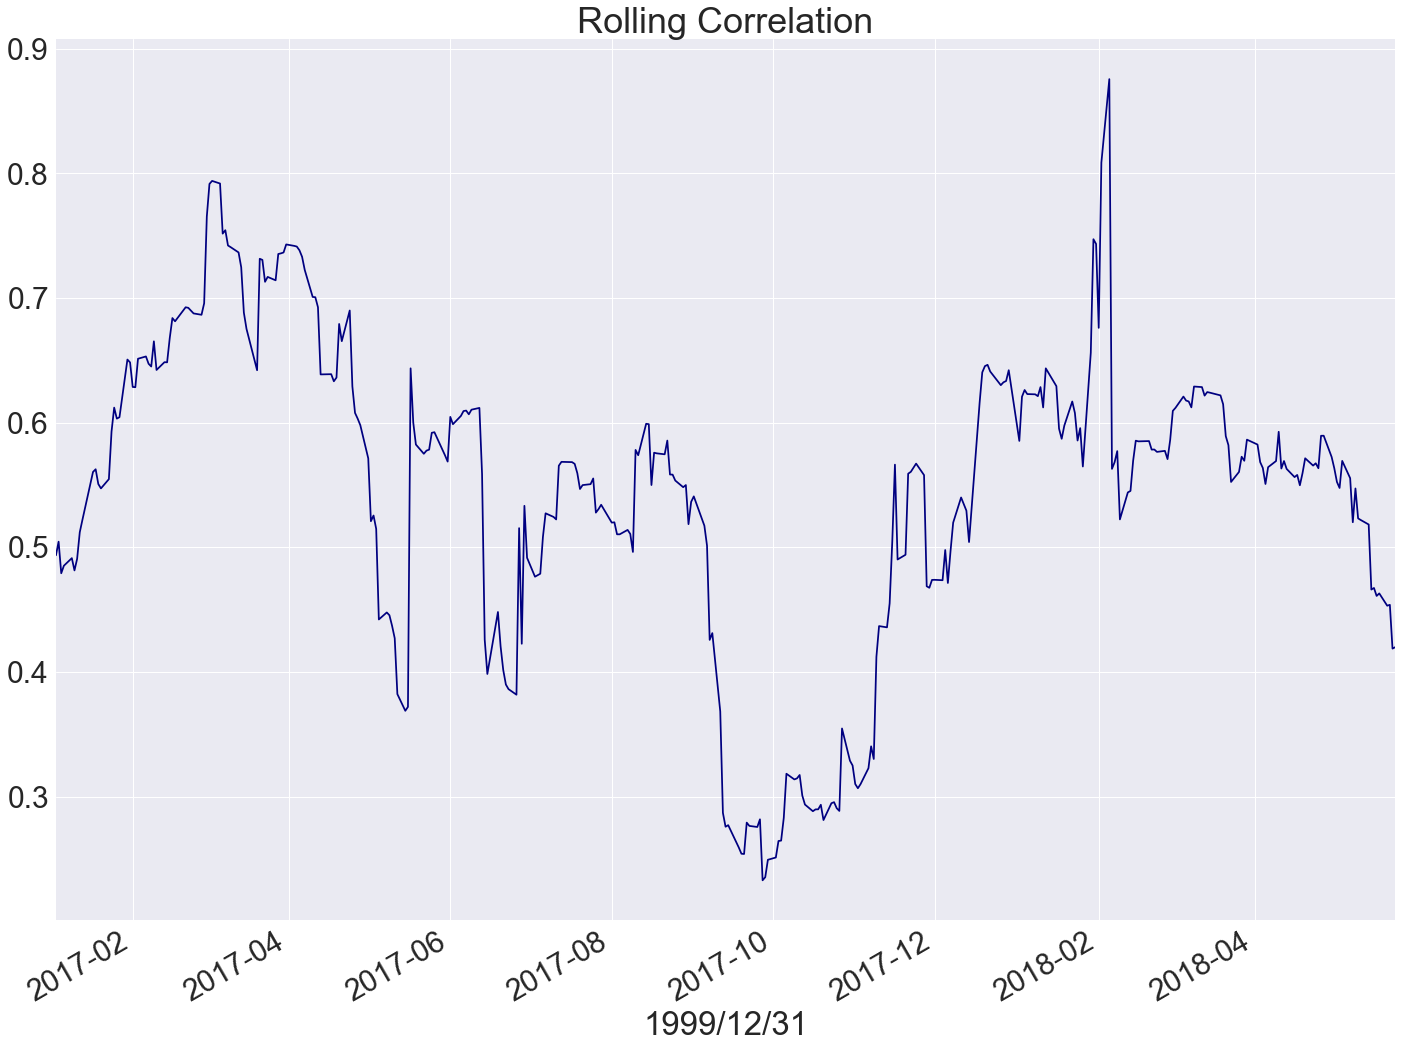

In [108]:
pd.ewmcorr(df.CTA,df['SP500'],20)['2017':].plot(colormap='jet',title='Rolling Correlation')

In [111]:
from mail import Email
e=Email(to='mark.refermat@gmail.com',subject='Morning Update: Soc Gen Indices')
e.add_attachments(['socgen.png','socgen_corr.png'])
e.send()

{'MessageId': '01000163a133ec8a-0f8c9100-18d4-496f-85ee-79f54bd25bb6-000000',
 'ResponseMetadata': {'HTTPHeaders': {'content-length': '338',
   'content-type': 'text/xml',
   'date': 'Sun, 27 May 2018 10:45:24 GMT',
   'x-amzn-requestid': '0fa61dcd-619b-11e8-99df-256f20f2ed9d'},
  'HTTPStatusCode': 200,
  'RequestId': '0fa61dcd-619b-11e8-99df-256f20f2ed9d',
  'RetryAttempts': 0}}

/Users/mrefermat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


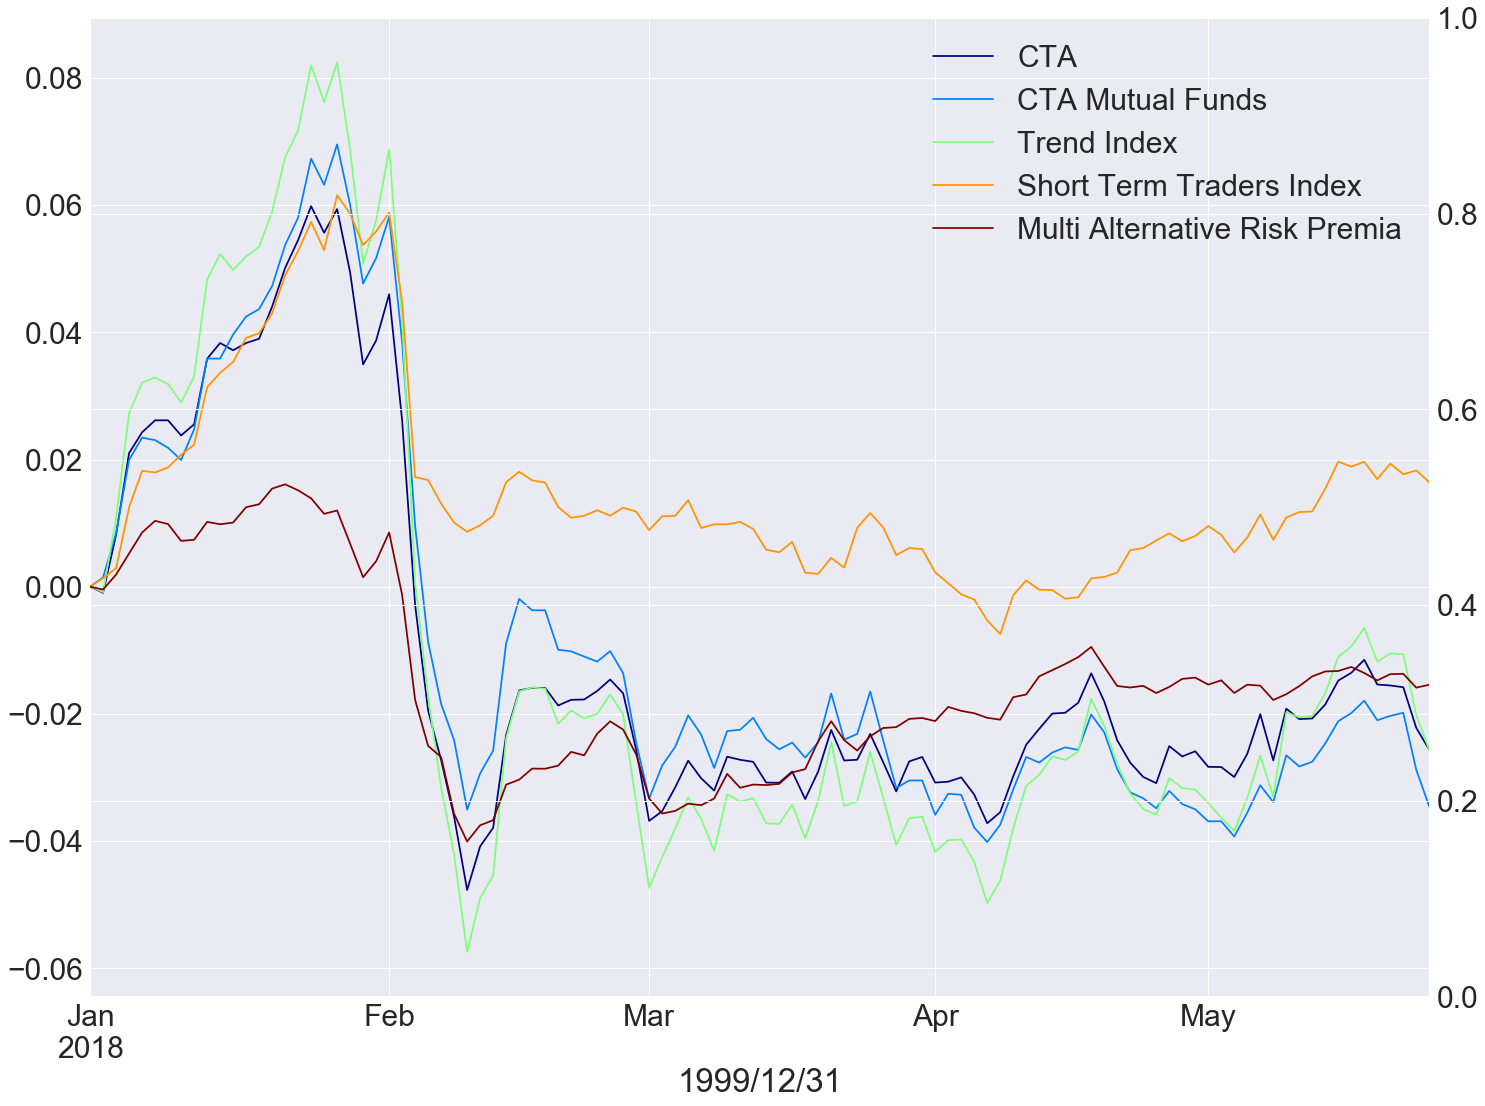

In [125]:
fig = plt.figure()
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

web_root='https://cib.societegenerale.com/fileadmin/indices_feeds/'
indices={'CTA':'CTA_Historical.xls',
         'CTA Mutual Funds':'CTAM_Historical.xls',
         'Trend Index':'Trend_Index_Historical.xls',
         'Short Term Traders Index':'STTI_Historical.xls',
         'Multi Alternative Risk Premia':'MARP_Historical.xls'
        }
data_index=pd.DataFrame()
for i in indices.keys():
    file='https://cib.societegenerale.com/fileadmin/indices_feeds/'+indices[i]
    data_index[i]=pd.read_csv(file,sep='\t',index_col=0,parse_dates=[0],usecols=[0,1]).ix[:,0]

data_pct=data_index.pct_change()

data_pct['2018':].cumsum().ffill().plot(colormap='jet',ax=ax)